# Fed Batch Bioreactor
This model represents the fed batch bioreactor in section 2.4.9 of Seborg et al.

| Nr  | Symbol      | Name                                 |                Units|
|-----|-------------|--------------------------------------|---------------------|
| 1   | $\mu_\text{max}$ |   Maximum specific growth rate  |                1/hr |
| 2   | $K_s$       |   Monod constant                     |                 g/L |
| 3   | $Y_{X/S}$   |   Cell yield coefficient             |                   1 |
| 4   | $Y_{P/S}$   |   Product yield coefficient          |                   1 |
| 5   | $X$         |   Cell mass concentration            |                 g/L |
| 6   | $S$         |   Substrate mass concentration       |                 g/L |
| 7   | $V$         |   Volume                             |                   L |
| 8   | $P$         |   Substrate mass concentration       |                 g/L |
| 9   | $F$         |   Feed flow rate                     |                L/hr |
| 10  | $S_f$       |   Substrate mass concentration       |                 g/L |
| 11  | $\mu$       |   Specific growth rate               |                1/hr |
| 12  | $r_g$       |   Cell growth rate                   |        g /( L hr)   |
| 13  | $r_p$       |   Product growth rate                |          g /( L hr) |  


Model equations:
    
| Nr     | Equation                              | Inputs     | Outputs         | Parameters              |
|--------|---------------------------------------|------------|-----------------|-------------------------|
| 1      | $$r_g = \mu X$$                       |      -     |        $r$, $\mu$, $X$ |   -  |                    
| 2      | $$\mu = \mu_{max} \frac{S}{K_S + S}$$ |      -      | $S$             | $\mu_\text{max}$, $K_s$ |
| 3      | $$r_p = Y_{P/X}r_G$$                  |      -      | $r_p$           | $Y_{P/X}$               |
| 4      | $$\frac{d(XV)}{dt} = Vr_g$$           |      -      | $V$             |   -                      |
| 5      | $$\frac{d(PV)}{dt} = Vr_p$$           |      -      | $P$             |    -                     |
| 6      | $$\frac{d(SV)}{dt} =  FS_f - Vr$$     | $F$, $S_f$ |  -               | $Y_{X/S}$               |
| 7      | $$\frac{dV}{dt} = F$$                 |      -      |  -               |    -                     |
| Number | 7                                     | 2          | 7               | 4                       |


Parameters

In [1]:
mu_max = 0.2  # Maximum growth rate
K_s = 1.0  # Monod constant
Y_xs = 0.5 # Cell yield coefficient
Y_px = 0.2  # Product yield coefficient

States

In [2]:
X = 0.05  # Concentration of the cells
S = 10   # Concentration of the substrate
P = 0   # Concentration of the product
V = 1   # Reactor volume

x0 = [X, S, P, V]  # State vector

Inputs

In [3]:
F = 0.05  # Feed rate
S_f = 10  # Concentration of substrate in feed

In [4]:
def dxdt(t, x):
    [X, S, P, V] = x
    
    mu = mu_max * S / (K_s + S)
    rg = mu * X
    rp = Y_px * rg
    dVdt = F
    dXdt = 1/V*(V * rg - dVdt*X)
    dPdt = 1/V*(V * rp - dVdt*P)
    dSdt = 1/V*(F * S_f - 1 / Y_xs * V * rg - dVdt*S)

    return [dXdt, dSdt, dPdt, dVdt]

In [5]:
import scipy.integrate
import numpy

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
tspan = [0, 30]

In [8]:
tsmooth = numpy.linspace(0, 30)

In [9]:
Fs = [0.05, 0.02]

In [10]:
results = []

In [11]:
for F in Fs:
    out = scipy.integrate.solve_ivp(dxdt, tspan, x0, t_eval=tsmooth)
    results.append(out)

In [12]:
names = ['X', 'S', 'P', 'V']
units = {'X': 'g/L', 'S': 'g/L', 'P': 'g/L', 'V': 'L'}

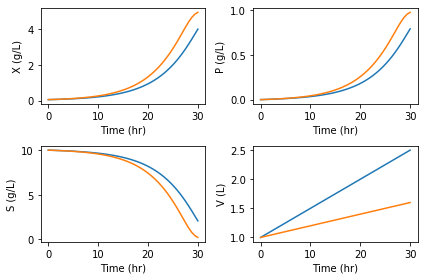

In [13]:
ax = {}

fig, [[ax['X'], ax['P']], [ax['S'], ax['V']]] = plt.subplots(2, 2)

for F, out in zip(Fs, results):
    var = {name: y for name, y in zip(names, out.y)}
    for name in names:
        ax[name].plot(out.t, var[name])
        ax[name].set_ylabel(f'{name} ({units[name]})')
        ax[name].set_xlabel('Time (hr)')
plt.tight_layout()